In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv("50_Startups.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [44]:
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA - Exploratory Data Analysis

Find Expected Profit based on the company's data. 

- profit = ± b1 * RDSpend , ± b2 * Admin , ± b3 * MS, ± b4 State   

    ± b1 * RDSpend , ± b2 * Admin , ± b3 * MS, ± b4 State  -> All These are Columns/Attributes/Dimensions/Features/Predictors/Independant

     b1,b2,b3,b4 are -> coefficients

     profit is -> Target/Dependant/

- plot all types of graphs

- find correlation

In [45]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [46]:
target = 'Profit'
cols = ['RDSpend', 'Administration', 'MarketingSpend','Profit'	]
df[cols].corr()[target]

RDSpend           0.977401
Administration    0.200717
MarketingSpend    0.747434
Profit            1.000000
Name: Profit, dtype: float64

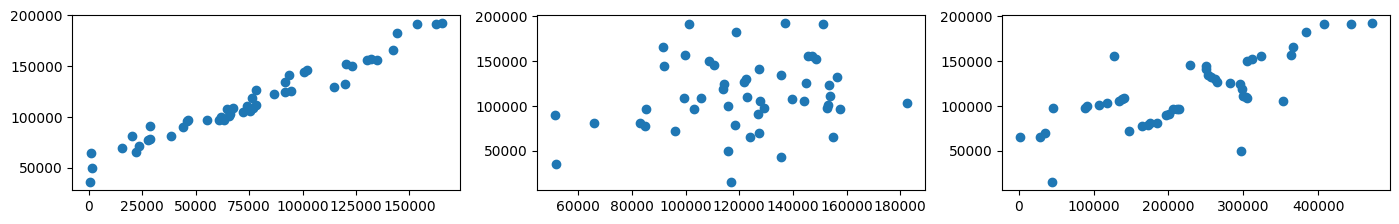

In [47]:
plt.figure(figsize=(23,5))

# subplot(nrows,ncols,index)
plt.subplot(2,4,1)
plt.scatter(df['RDSpend'],df['Profit'])

plt.subplot(2,4,2)
plt.scatter(df['Administration'],df['Profit'])

plt.subplot(2,4,3)
plt.scatter(df['MarketingSpend'],df['Profit'])

plt.show()

In [48]:
df.isna().sum()

RDSpend           2
Administration    0
MarketingSpend    3
State             0
Profit            0
dtype: int64

In [49]:
df.describe()

,RDSpend,Administration,MarketingSpend,Profit
count,48.000000,50.000000,47.000000,50.000000
mean,76793.349583,121344.639600,224494.784894,112012.639200
std,44224.086236,28017.802755,113316.503936,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,45528.002500,103730.875000,139268.715000,90138.902500
50%,74661.715000,122699.795000,229160.950000,107978.190000
75%,105065.712500,144842.180000,301528.275000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


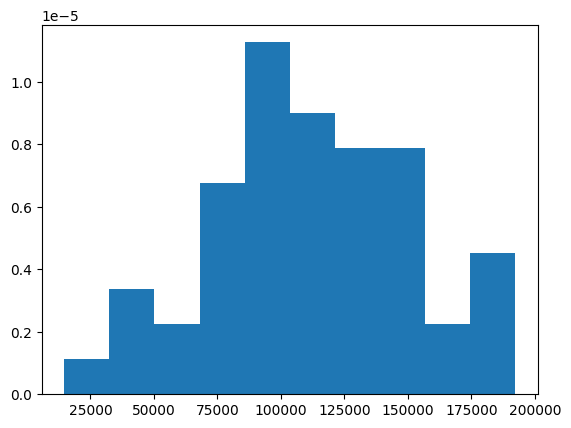

In [50]:
# density plot
plt.hist(df['Profit'],density=True)
plt.show()

<Axes: xlabel='Profit', ylabel='Density'>

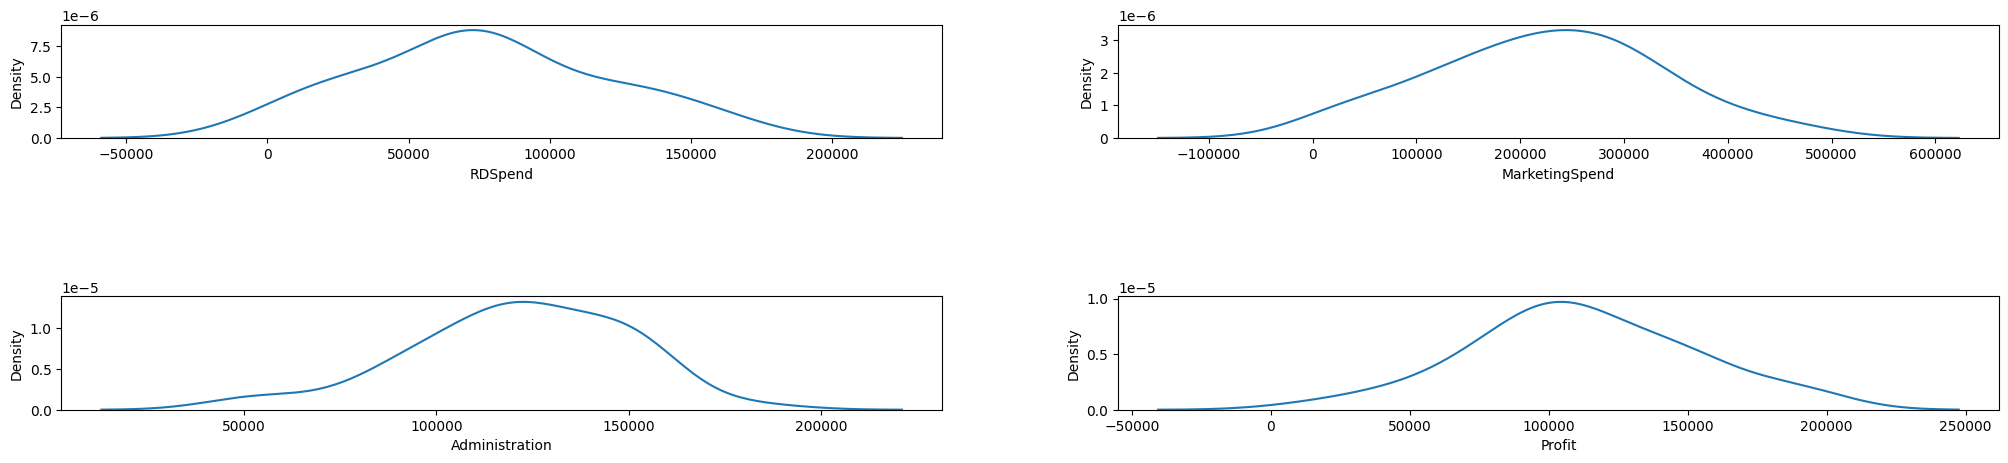

In [63]:
plt.figure(figsize=(25,5))
plt.subplot(3,2,1)
sns.kdeplot(df['RDSpend'])

plt.subplot(3,2,2)
sns.kdeplot(df['MarketingSpend'])

plt.subplot(3,2,5)
sns.kdeplot(df['Administration'])

plt.subplot(3,2,6)
sns.kdeplot(df['Profit'])

In [52]:
# fill na values for RDSpend and MarketingSpend
df['RDSpend'] = df['RDSpend'].fillna(df['RDSpend'].mean().round(2))
df['MarketingSpend'] = df['MarketingSpend'].fillna(df['MarketingSpend'].mean().round(2))
df.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

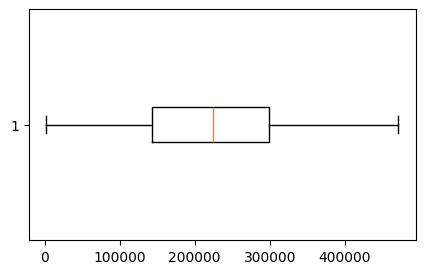

In [65]:
# find outliers
plt.figure(figsize=(5,3))
plt.boxplot(df['MarketingSpend'], vert=False)
plt.show()

# Label Encoding

 - Process to assign a number to a text is label encoding.
   
 - Ordinal Data (Order matters): Use Label Encoding.

 - Nominal Data (No order): Use One-Hot Encoding.

In [76]:
x = df.iloc[:, [0,1,2]].values
y = df.iloc[:, [4]].values
print(x.shape, y.shape)

(50, 3) (50, 1)


In [79]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
